# Introduction 

1. **Notebook Description** In this notebook, I conduct exploratory data analysis (EDA)on WRI dataset
2. **Author** Filippo Radice Fossati
3. **Date** 09/22/2023

# Notebook Structure 

This notebook is structured as follows:

1. **Section 1**: Importing necessary libraries and datasets.
2. **Section 2**: EDA on WRI dataset

# Section 1 - Import Libraries & Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import seaborn as sns
import matplotlib.pyplot as plt


import rasterio
import osmnx as ox
import geopandas as gpd

import support_function as sf

%load_ext autoreload
%autoreload 2
#to suppress scientifc notation

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (6, 6), 'axes.edgecolor': '0.2'})

In [2]:
#loading all input df
asset = gpd.read_file('./_data/Asset_Data_v1.csv')
wri = pd.read_csv('./_data/wri/baseline/annual/csv/y2019m07d11_aqueduct30_annual_v01.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/kz/gkm958296f79lgmty6dfw0xc0000gn/T/ipykernel_45362/1426374301.py:3: DtypeWarning: Columns (12,16,20,24,32,36,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  wri = pd.read_csv('./_data/wri/baseline/annual/csv/y2019m07d11_aqueduct30_annual_v01.csv')
/var/folders/kz/gkm958296f79lgmty6dfw0xc0000gn/T/ipykernel_45362/1426374301.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [3]:
wri.head()

,string_id,aq30_id,pfaf_id,gid_1,aqid,gid_0,name_0,name_1,area_km2,bws_raw,...,w_awr_tex_rrr_raw,w_awr_tex_rrr_score,w_awr_tex_rrr_cat,w_awr_tex_rrr_label,w_awr_tex_rrr_weight_fraction,w_awr_tex_tot_raw,w_awr_tex_tot_score,w_awr_tex_tot_cat,w_awr_tex_tot_label,w_awr_tex_tot_weight_fraction
0,111011-EGY.11_1-3365,0,111011,EGY.11_1,3365,EGY,Egypt,Al Qahirah,4.223754,2.318042,...,1.622678,2.165272,2.0,Medium - High (2-3),0.326531,2.457171,3.614603,3.0,High (3-4),0.877551
1,111011-EGY.15_1-3365,1,111011,EGY.15_1,3365,EGY,Egypt,As Suways,1846.012343,2.318042,...,1.622678,2.165272,2.0,Medium - High (2-3),0.326531,2.457171,3.614603,3.0,High (3-4),0.877551
2,111011-EGY.15_1-None,2,111011,EGY.15_1,-9999,EGY,Egypt,As Suways,30.526067,2.318042,...,1.622678,2.165272,2.0,Medium - High (2-3),0.326531,2.457171,3.614603,3.0,High (3-4),0.877551
3,111011-None-3365,3,111011,-9999,3365,-9999,-9999,-9999,0.742712,2.318042,...,0.445356,1.133763,1.0,Low - Medium (1-2),0.163265,2.477321,3.649648,3.0,High (3-4),0.551020
4,111011-None-None,4,111011,-9999,-9999,-9999,-9999,-9999,13.430995,2.318042,...,0.445356,1.133763,1.0,Low - Medium (1-2),0.163265,2.477321,3.649648,3.0,High (3-4),0.551020


# Section 2 - EDA on WRI

## 2.1 - Asset Level Data

**Asset Dataset** This is a list of assets owned or operated by 3 the following mining companies:i)BHP Group; ii) Freeport-McMoRan Inc.;iii)Glencore plc. I can assume that each asset is fully owned by teh relevant company. 
In this section I am just cleaning the dataframe so it can get merged and used with World Resource Institue dataset (WRI)

In [4]:
#renaming columns
asset.columns = asset.columns.map(lambda x: '_'.join(x.split(' ')).lower())
asset.columns

Index(['data_source', 'key_id', 'asset_id', 'asset_name', 'asset_id_type',
       'year', 'country', 'latitude', 'longitude', 'facility_category',
       'activity_description', 'owner_name', 'owner_mi_key', 'owner_ciq_id',
       'owner_isin', 'ultimate_parent_name', 'ultimate_parent_mi_key',
       'ultimate_parent_ciq_id', 'ultimate_parent_isin', 'trucost_uid',
       'ultimate_parent_uid', 'gics_sector', 'category', 'geometry_epsg_8857',
       'geometry_epsg_4326', 'geometry'],
      dtype='object')

In [5]:
#gics sectors
asset['gics_sector'].unique()

array(['Diversified Metals & Mining', 'Copper'], dtype=object)

In [6]:
#Because teh goemtry presents some POLYGON EMPTY I will filtered them out for validation purposes
# Filter out rows with empty polygons
# asset_filtered = asset[asset['geometry_epsg_4326'] != 'POLYGON EMPTY'].copy()
asset_geography= gpd.GeoDataFrame(asset,
                crs="EPSG:4326",
                geometry=gpd.points_from_xy(asset['longitude'], asset['latitude']))
asset_geography

,data_source,key_id,asset_id,asset_name,asset_id_type,year,country,latitude,longitude,facility_category,...,ultimate_parent_mi_key,ultimate_parent_ciq_id,ultimate_parent_isin,trucost_uid,ultimate_parent_uid,gics_sector,category,geometry_epsg_8857,geometry_epsg_4326,geometry
0,EU NPRI,6377,43558,Nordenhamer Zinkhütte GmbH,EU NPRI,2021,Germany,53.50726,8.502314,Regulated Industrial Site,...,4113732,704674,JE00B4T3BW64,123592,123592,Diversified Metals & Mining,Asset,"POLYGON ((652946.774964 6331403.598938, 652929...","POLYGON ((8.502672 53.507305, 8.502451 53.5073...",POINT (8.50231 53.50726)
1,IHS Refining and Chemicals,139067,108778,Witcons Colliery,IHS Refining and Chemicals,2021,South Africa,-26.095934,29.147081,Industrial Plant,...,4113732,704674,JE00B4T3BW64,123592,123592,Diversified Metals & Mining,Asset,"POLYGON ((2655040.542005 -3293570.754672, 2654...","POLYGON ((29.1325 -26.0929, 29.129 -26.0981, 2...",POINT (29.14708 -26.09593)
2,S&P Market Intelligence Company Headquarters,1036525,6355795,Xstrata Recycling Inc.,KeyInstn,2021,Canada,43.648636,-79.381744,Company Headquarters,...,4113732,704674,JE00B4T3BW64,null,123592,Diversified Metals & Mining,HQ,"POLYGON ((-6586014.570428 5321859.455173, -658...","POLYGON ((-79.383849 43.649056, -79.383532 43....",POINT (-79.38174 43.64864)
3,S&P Market Intelligence Office Locations,1501696,3341810,Secondary Address,KeyAddress,2021,Ukraine,46.966774,31.978462,Instn Address,...,4113732,704674,JE00B4T3BW64,null,123592,Diversified Metals & Mining,Asset,"POLYGON ((2590339.21923 5674443.398376, 259034...","POLYGON ((31.978444 46.96668, 31.978574 46.966...",POINT (31.97846 46.96677)
4,IHS Exploration and Production,75490,1188506,ANADARKO BASIN/Brown Dolomite/Freeport Mcmoran,IHS Exploration and Production,2021,United States of America,35.97635,-100.80881,Oil and Gas Exploration and Production,...,4004107,273607,US35671D8570,43856,43856,Copper,Asset,"POLYGON ((-8770964.511568 4464981.961458, -877...","POLYGON ((-100.807674 35.976349, -100.807633 3...",POINT (-100.80881 35.97635)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,Canadian NPRI,5112,19817,North Battleford Viterra,Canadian NPRI,2021,Canada,52.7719,-108.292,Regulated Industrial Site,...,4113732,704674,JE00B4T3BW64,85191,123592,Diversified Metals & Mining,Asset,POLYGON EMPTY,POLYGON EMPTY,POINT (-108.29200 52.77190)
803,IHS Exploration and Production,93413,1203304,Tuna Marlin-Turrum,IHS Exploration and Production,2021,Australia,-38.17207,148.4188,Oil and Gas Exploration and Production,...,4121840,256654,AU000000BHP4,null,44114,Diversified Metals & Mining,Asset,POLYGON EMPTY,POLYGON EMPTY,POINT (148.41880 -38.17207)
804,IHS Refining and Chemicals,139070,221850,Boschmans Colliery,IHS Refining and Chemicals,2021,South Africa,-26.044075,29.128708,Industrial Plant,...,4113732,704674,JE00B4T3BW64,123592,123592,Diversified Metals & Mining,Asset,"POLYGON ((2663213.668959 -3285871.677294, 2662...","POLYGON ((29.215 -26.0296, 29.203 -26.0374, 29...",POINT (29.12871 -26.04407)
805,S&P Market Intelligence Company Headquarters,945938,4010695,3TEC Energy Corp.,KeyInstn,2021,United States of America,29.759996,-95.36541,Company Headquarters,...,4004107,273607,US35671D8570,null,43856,Copper,HQ,"POLYGON ((-8559069.938968 3735742.805861, -855...","POLYGON ((-95.365709 29.760569, -95.365668 29....",POINT (-95.36541 29.76000)


In [7]:
#printing world
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## 2.2 - WRI Data

**Company Universe Data** This dataset contains water use and revenue-related datapoints on the universe of companies covered by the dataset. It can be considered a relevant representation of businesses across the various sectors of the economy

In [8]:
#renaming columns
wri.columns = wri.columns.map(lambda x: '_'.join(x.split(' ')).lower())
wri.columns

Index(['string_id', 'aq30_id', 'pfaf_id', 'gid_1', 'aqid', 'gid_0', 'name_0',
       'name_1', 'area_km2', 'bws_raw',
       ...
       'w_awr_tex_rrr_raw', 'w_awr_tex_rrr_score', 'w_awr_tex_rrr_cat',
       'w_awr_tex_rrr_label', 'w_awr_tex_rrr_weight_fraction',
       'w_awr_tex_tot_raw', 'w_awr_tex_tot_score', 'w_awr_tex_tot_cat',
       'w_awr_tex_tot_label', 'w_awr_tex_tot_weight_fraction'],
      dtype='object', length=260)

In [9]:
wri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68506 entries, 0 to 68505
Columns: 260 entries, string_id to w_awr_tex_tot_weight_fraction
dtypes: float64(199), int64(3), object(58)
memory usage: 135.9+ MB


In [10]:
wri.sample(5)

,string_id,aq30_id,pfaf_id,gid_1,aqid,gid_0,name_0,name_1,area_km2,bws_raw,...,w_awr_tex_rrr_raw,w_awr_tex_rrr_score,w_awr_tex_rrr_cat,w_awr_tex_rrr_label,w_awr_tex_rrr_weight_fraction,w_awr_tex_tot_raw,w_awr_tex_tot_score,w_awr_tex_tot_cat,w_awr_tex_tot_label,w_awr_tex_tot_weight_fraction
30774,424600-CHN.18_1-1385,30775,424600,CHN.18_1,1385,CHN,China,Liaoning,1555.939193,0.732127,...,2.282851,2.627575,2.0,Medium - High (2-3),0.326531,2.569165,3.809382,3.0,High (3-4),0.918367
55340,752123-MEX.19_1-1724,55343,752123,MEX.19_1,1724,MEX,Mexico,Nuevo León,1633.918800,1.178750,...,1.938976,2.386768,2.0,Medium - High (2-3),0.326531,2.091331,2.974765,2.0,Medium - High (2-3),1.000000
49458,642867-BRA.9_1-2667,49461,642867,BRA.9_1,2667,BRA,Brazil,Goiás,1967.166456,0.003305,...,3.686934,3.782737,3.0,High (3-4),0.326531,2.131491,3.048187,3.0,High (3-4),0.918367
13381,181705-None-2692,13381,181705,-9999,2692,-9999,-9999,-9999,18.133908,0.051581,...,5.000000,5.000000,4.0,Extremely High (4-5),0.163265,2.254070,3.261374,3.0,High (3-4),0.591837
13313,181604-MDG.3_1-2800,13313,181604,MDG.3_1,2800,MDG,Madagascar,Fianarantsoa,47.497985,0.025405,...,4.266667,4.315254,4.0,Extremely High (4-5),0.326531,2.847637,4.072750,4.0,Extremely High (4-5),0.918367


In [11]:
#listing out all columns
[x for x in wri.columns]

['string_id',
 'aq30_id',
 'pfaf_id',
 'gid_1',
 'aqid',
 'gid_0',
 'name_0',
 'name_1',
 'area_km2',
 'bws_raw',
 'bws_score',
 'bws_cat',
 'bws_label',
 'bwd_raw',
 'bwd_score',
 'bwd_cat',
 'bwd_label',
 'iav_raw',
 'iav_score',
 'iav_cat',
 'iav_label',
 'sev_raw',
 'sev_score',
 'sev_cat',
 'sev_label',
 'gtd_raw',
 'gtd_score',
 'gtd_cat',
 'gtd_label',
 'rfr_raw',
 'rfr_score',
 'rfr_cat',
 'rfr_label',
 'cfr_raw',
 'cfr_score',
 'cfr_cat',
 'cfr_label',
 'drr_raw',
 'drr_score',
 'drr_cat',
 'drr_label',
 'ucw_raw',
 'ucw_score',
 'ucw_cat',
 'ucw_label',
 'cep_raw',
 'cep_score',
 'cep_cat',
 'cep_label',
 'udw_raw',
 'udw_score',
 'udw_cat',
 'udw_label',
 'usa_raw',
 'usa_score',
 'usa_cat',
 'usa_label',
 'rri_score',
 'rri_cat',
 'rri_label',
 'w_awr_def_qan_raw',
 'w_awr_def_qan_score',
 'w_awr_def_qan_cat',
 'w_awr_def_qan_label',
 'w_awr_def_qan_weight_fraction',
 'w_awr_def_qal_raw',
 'w_awr_def_qal_score',
 'w_awr_def_qal_cat',
 'w_awr_def_qal_label',
 'w_awr_def_qal_

In [12]:
# based upon the methodology, and to simplify the work, I will rely on the w_awr_min_tot_raw which indicates 
# industry-specific weighting scheme for mining. Is the overall water risk for ining
total_water_risk_mining = wri[['string_id',
 'aq30_id',
 'pfaf_id',
 'gid_1',
 'aqid',
 'gid_0',
 'name_0',
 'name_1',
 'area_km2',
'w_awr_min_tot_raw',
'bws_raw',
#  'w_awr_min_tot_score',
#  'w_awr_min_tot_cat',
#  'w_awr_min_tot_label',
#  'w_awr_min_tot_weight_fraction',]]
                               ]]
total_water_risk_mining

,string_id,aq30_id,pfaf_id,gid_1,aqid,gid_0,name_0,name_1,area_km2,w_awr_min_tot_raw,bws_raw
0,111011-EGY.11_1-3365,0,111011,EGY.11_1,3365,EGY,Egypt,Al Qahirah,4.223754,2.240525,2.318042
1,111011-EGY.15_1-3365,1,111011,EGY.15_1,3365,EGY,Egypt,As Suways,1846.012343,2.240525,2.318042
2,111011-EGY.15_1-None,2,111011,EGY.15_1,-9999,EGY,Egypt,As Suways,30.526067,2.240525,2.318042
3,111011-None-3365,3,111011,-9999,3365,-9999,-9999,-9999,0.742712,2.144309,2.318042
4,111011-None-None,4,111011,-9999,-9999,-9999,-9999,-9999,13.430995,2.144309,2.318042
...,...,...,...,...,...,...,...,...,...,...,...
68501,None-YEM.5_1-None,68506,-9999,YEM.5_1,-9999,YEM,Yemen,Al Hudaydah,0.887022,4.528339,-9999.000000
68502,None-ZAF.1_1-None,68507,-9999,ZAF.1_1,-9999,ZAF,South Africa,Eastern Cape,0.019523,1.680593,-9999.000000
68503,None-ZAF.4_1-None,68508,-9999,ZAF.4_1,-9999,ZAF,South Africa,KwaZulu-Natal,0.085616,1.680593,-9999.000000
68504,None-ZAF.9_1-2940,68509,-9999,ZAF.9_1,2940,ZAF,South Africa,Western Cape,0.015411,1.680593,-9999.000000


In [13]:
total_water_risk_mining[total_water_risk_mining['bws_raw']>=0].describe()

,aq30_id,pfaf_id,aqid,area_km2,w_awr_min_tot_raw,bws_raw
count,59409.000000,59409.000000,59409.000000,59409.000000,59409.000000,59409.000000
mean,31368.744382,427779.244946,695.881769,2136.795054,1.899243,0.355659
std,18354.334263,234328.154011,3744.708501,4029.407790,0.841092,1.524814
min,0.000000,111011.000000,-9999.000000,0.003453,0.065587,0.000000
25%,15281.000000,221001.000000,1093.000000,48.227057,1.155970,0.005510
50%,31434.000000,432993.000000,1694.000000,509.042458,1.974801,0.082969
75%,47299.000000,631091.000000,2569.000000,2499.957772,2.562163,0.542587
max,63350.000000,914900.000000,3401.000000,106200.954714,4.713669,147.762565


In [14]:
#Checking Null Values
total_water_risk_mining.isnull().mean()

string_id            0.0
aq30_id              0.0
pfaf_id              0.0
gid_1                0.0
aqid                 0.0
gid_0                0.0
name_0               0.0
name_1               0.0
area_km2             0.0
w_awr_min_tot_raw    0.0
bws_raw              0.0
dtype: float64

## 2.3 - WRI & Asset Level Data

In this section I want to combine WRI with asset to see what average country water risk all assets are facing. To do that, I am merging first the world dataset and then I join the resulting dataset with asset dataframe

In [15]:
world.iso_a3.unique()

array(['FJI', 'TZA', 'ESH', 'CAN', 'USA', 'KAZ', 'UZB', 'PNG', 'IDN',
       'ARG', 'CHL', 'COD', 'SOM', 'KEN', 'SDN', 'TCD', 'HTI', 'DOM',
       'RUS', 'BHS', 'FLK', 'NOR', 'GRL', 'ATF', 'TLS', 'ZAF', 'LSO',
       'MEX', 'URY', 'BRA', 'BOL', 'PER', 'COL', 'PAN', 'CRI', 'NIC',
       'HND', 'SLV', 'GTM', 'BLZ', 'VEN', 'GUY', 'SUR', 'FRA', 'ECU',
       'PRI', 'JAM', 'CUB', 'ZWE', 'BWA', 'NAM', 'SEN', 'MLI', 'MRT',
       'BEN', 'NER', 'NGA', 'CMR', 'TGO', 'GHA', 'CIV', 'GIN', 'GNB',
       'LBR', 'SLE', 'BFA', 'CAF', 'COG', 'GAB', 'GNQ', 'ZMB', 'MWI',
       'MOZ', 'SWZ', 'AGO', 'BDI', 'ISR', 'LBN', 'MDG', 'PSE', 'GMB',
       'TUN', 'DZA', 'JOR', 'ARE', 'QAT', 'KWT', 'IRQ', 'OMN', 'VUT',
       'KHM', 'THA', 'LAO', 'MMR', 'VNM', 'PRK', 'KOR', 'MNG', 'IND',
       'BGD', 'BTN', 'NPL', 'PAK', 'AFG', 'TJK', 'KGZ', 'TKM', 'IRN',
       'SYR', 'ARM', 'SWE', 'BLR', 'UKR', 'POL', 'AUT', 'HUN', 'MDA',
       'ROU', 'LTU', 'LVA', 'EST', 'DEU', 'BGR', 'GRC', 'TUR', 'ALB',
       'HRV', 'CHE',

In [16]:
total_water_risk_mining.gid_0.unique()

array(['EGY', '-9999', 'SDN', 'ERI', 'SOM', 'ETH', 'DJI', 'YEM', 'KEN',
       'TZA', 'UGA', 'SSD', 'ZMB', 'MOZ', 'MWI', 'ZWE', 'COD', 'BWA',
       'NAM', 'AGO', 'ZAF', 'SWZ', 'LSO', 'COG', 'GAB', 'CAF', 'CMR',
       'BDI', 'RWA', 'GNQ', 'NGA', 'STP', 'TCD', 'BEN', 'NER', 'MLI',
       'DZA', 'BFA', 'MRT', 'CIV', 'GIN', 'SLE', 'TGO', 'GHA', 'LBR',
       'GNB', 'SEN', 'GMB', 'ESH', 'MAR', 'ESP', 'PRT', 'TUN', 'ITA',
       'LBY', 'MDG', 'ATF', 'COM', 'MYT', 'SYC', 'ISR', 'PSE', 'LBN',
       'SYR', 'TUR', 'CYP', 'XAD', 'XNC', 'GRC', 'BGR', 'MKD', 'SRB',
       'XKO', 'ALB', 'MNE', 'BIH', 'HRV', 'SVN', 'AUT', 'CHE', 'FRA',
       'SMR', 'AND', 'MLT', 'GEO', 'RUS', 'UKR', 'BLR', 'MDA', 'POL',
       'ROU', 'HUN', 'SVK', 'CZE', 'DEU', 'GGY', 'JEY', 'BEL', 'NLD',
       'LUX', 'LIE', 'GBR', 'IMN', 'IRL', 'FRO', 'DNK', 'LTU', 'LVA',
       'EST', 'FIN', 'ALA', 'NOR', 'SWE', 'SJM', 'ISL', 'TKM', 'UZB',
       'KAZ', 'IRN', 'AFG', 'IRQ', 'AZE', 'ARM', 'PAK', 'SAU', 'JOR',
       'KWT', 'BHR

In [17]:
#Removing -9999 value before merge
total_water_risk_mining = total_water_risk_mining[(total_water_risk_mining['gid_0']!='-9999')&
                                                 (total_water_risk_mining['w_awr_min_tot_raw']!=-9999.000000)]

#There is a substantial variability within basin of the same country
total_water_risk_mining[total_water_risk_mining['gid_0']=='EGY'].describe()

,aq30_id,pfaf_id,aqid,area_km2,w_awr_min_tot_raw,bws_raw
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,12267.190083,165088.435262,1372.537190,2721.039769,1.907934,-302.221607
std,9523.042728,45278.532667,3965.669387,4631.791722,0.501006,1716.530517
min,0.000000,-9999.000000,-9999.000000,0.006574,0.613165,-9999.000000
25%,10694.500000,158401.500000,1691.000000,144.714533,1.564709,0.495468
50%,11716.000000,171000.000000,3323.000000,841.824766,1.813370,1.000000
75%,11806.500000,172118.000000,3323.000000,3356.428225,2.284590,1.000000
max,64061.000000,299062.000000,3369.000000,45878.312708,4.154409,2.751789


In [18]:
#nonethelss I am averaging out one value
average_water_risk_country = total_water_risk_mining[['gid_0'
                                                      ,'w_awr_min_tot_raw']].groupby('gid_0').max().reset_index()
average_water_risk_country

,gid_0,w_awr_min_tot_raw
0,AFG,3.813333
1,AGO,4.182222
2,ALA,1.160622
3,ALB,2.793792
4,AND,1.272428
...,...,...
221,XNC,1.595834
222,YEM,4.528339
223,ZAF,2.887934
224,ZMB,3.239095


In [19]:
# Assuming your dataframe is named df
# Merge the dataframes on the ISO A3 country code
average_water_risk_world = world.merge(average_water_risk_country, left_on='iso_a3', right_on='gid_0')
average_water_risk_world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gid_0,w_awr_min_tot_raw
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,2.008707
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,4.111111
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,4.713669
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,1.712971
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,2.522028
...,...,...,...,...,...,...,...,...
167,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MKD,2.237873
168,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SRB,1.826141
169,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNE,1.458032
170,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,2.582071


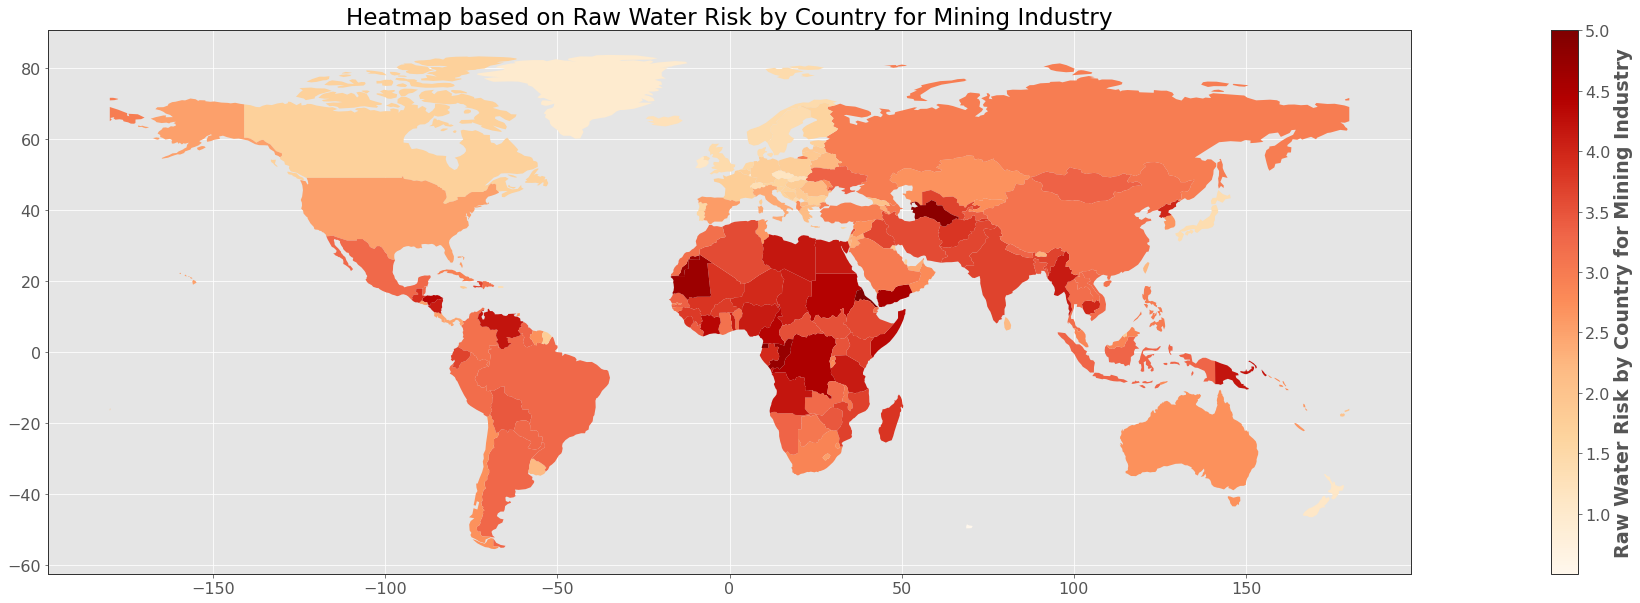

In [20]:
#plotting heatmaps for the whole World Water Risk
fig, ax = plt.subplots(1, 1, figsize=(50, 10))
average_water_risk_world.plot(column='w_awr_min_tot_raw', ax=ax, legend=True,
            legend_kwds={'label': "Raw Water Risk by Country for Mining Industry"},
            cmap='OrRd')  # using OrRd colormap, you can choose another
ax.set_title('Heatmap based on Raw Water Risk by Country for Mining Industry')
plt.show()

In [21]:
asset_geography.columns

Index(['data_source', 'key_id', 'asset_id', 'asset_name', 'asset_id_type',
       'year', 'country', 'latitude', 'longitude', 'facility_category',
       'activity_description', 'owner_name', 'owner_mi_key', 'owner_ciq_id',
       'owner_isin', 'ultimate_parent_name', 'ultimate_parent_mi_key',
       'ultimate_parent_ciq_id', 'ultimate_parent_isin', 'trucost_uid',
       'ultimate_parent_uid', 'gics_sector', 'category', 'geometry_epsg_8857',
       'geometry_epsg_4326', 'geometry'],
      dtype='object')

In [22]:
#let's do now a spatial join between asset_geography and average_water_risk_world
asset_average_water_risk_world = gpd.sjoin(asset_geography, average_water_risk_world, how="left", op='within')
asset_average_water_risk_world.sample(2)

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,data_source,key_id,asset_id,asset_name,asset_id_type,year,country,latitude,longitude,facility_category,...,geometry_epsg_4326,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est,gid_0,w_awr_min_tot_raw
250,S&P Market Intelligence Metals and Mining Prop...,1337358,39022,Hunter Valley Operations,KeyMineProject,2021,Australia,-32.48795,150.98045,Mining Property,...,"POLYGON ((150.9784 -32.4799, 150.971 -32.4869,...",POINT (150.98045 -32.48795),136.0,25364307.0,Oceania,Australia,AUS,1396567.0,AUS,2.715173
598,S&P Market Intelligence Metals and Mining Prop...,1337404,61569,Northfleet Refinery,KeyMineProject,2021,United Kingdom,51.45593,0.31995,Mining Property,...,"POLYGON ((0.32862 51.45593, 0.328577 51.455259...",POINT (0.31995 51.45593),142.0,66834405.0,Europe,United Kingdom,GBR,2829108.0,GBR,1.442516


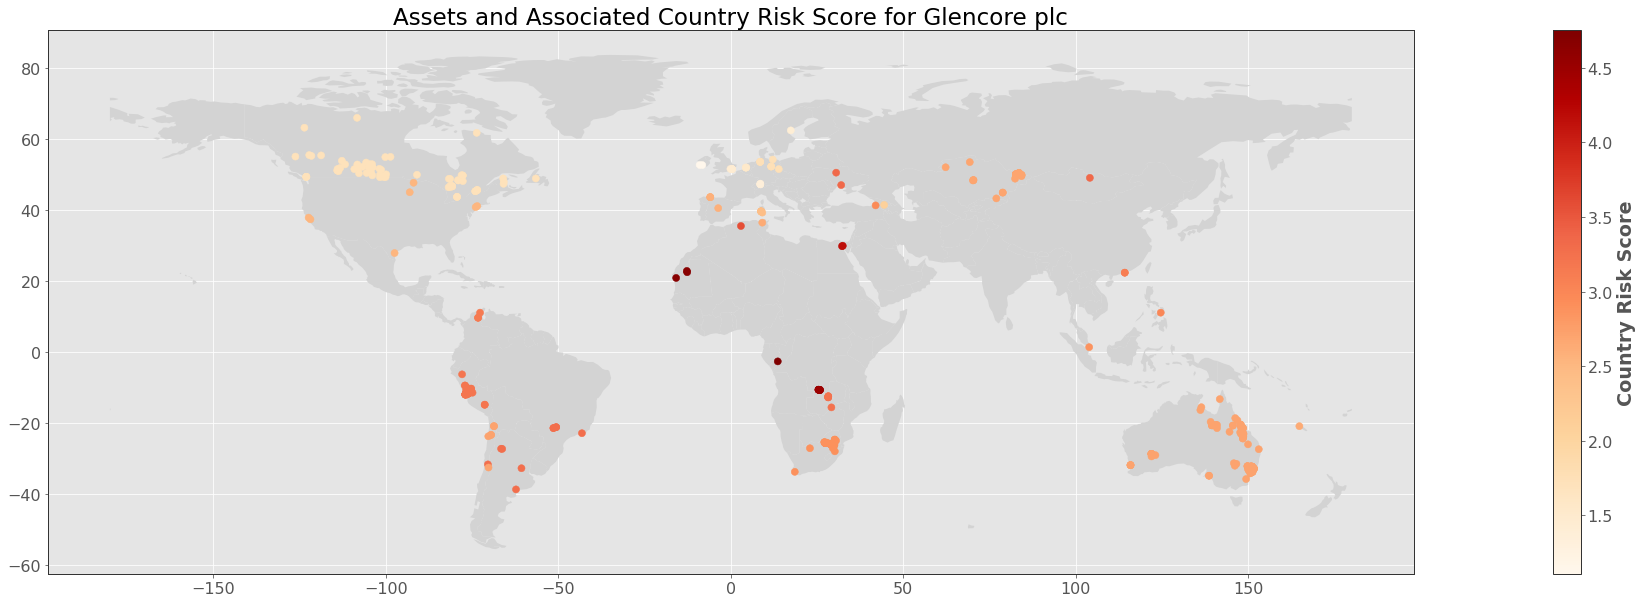

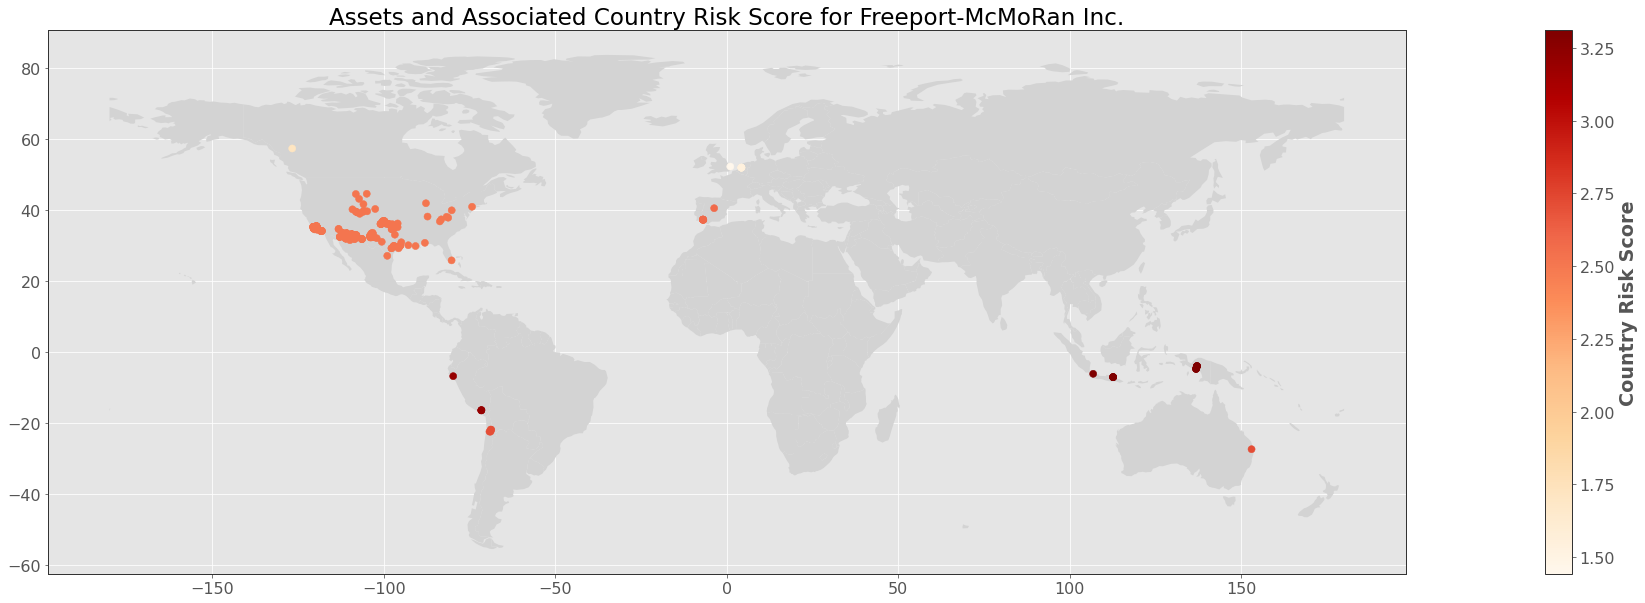

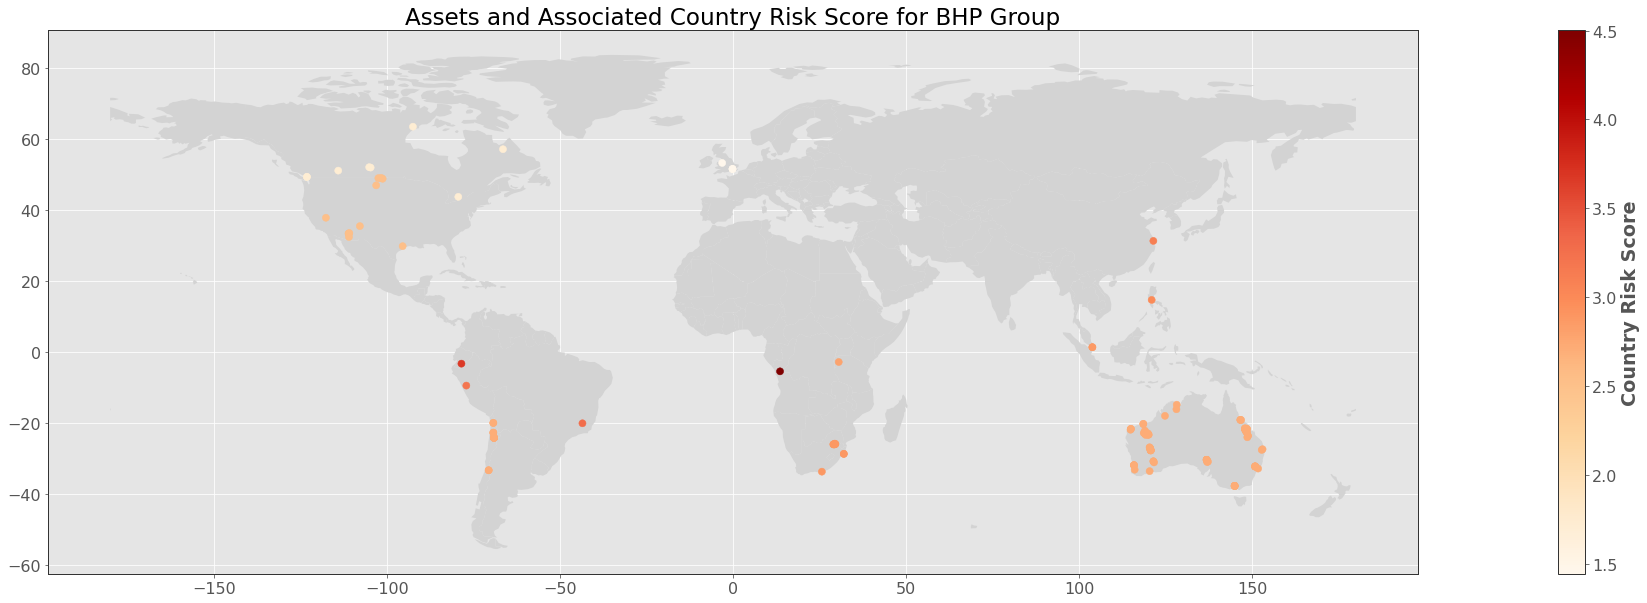

In [23]:
companies = asset_average_water_risk_world['ultimate_parent_name'].unique()

for company in companies:
    # Filter assets for the current company using the ultimate_parent_isin
    company_assets = asset_average_water_risk_world[asset_average_water_risk_world['ultimate_parent_name'] == company].copy()

    # Check if the filtered dataframe is empty
    if company_assets.empty:
        print(f"No assets found for company {company}")
        continue

    # Handle NaN values. Here, we're simply dropping them, but you might choose another method
    company_assets.dropna(subset=['w_awr_min_tot_raw'], inplace=True)

    fig, ax = plt.subplots(1, 1, figsize=(50, 10))

    # Plot countries
    average_water_risk_world.plot(ax=ax, color='lightgrey')

    # Plot assets colored by risk_score
    company_assets.plot(column='w_awr_min_tot_raw', ax=ax, legend=True, markersize=50,
                        legend_kwds={'label': "Country Risk Score"},
                        cmap='OrRd')  # using OrRd colormap, you can choose another
    ax.set_title(f'Assets and Associated Country Risk Score for {company}')
    plt.show()
